# **Actividad I**
## *Antonio Cabrera y Álvaro Salís*

### Imagen 1 – CLAHE manual

/tmp/ipykernel_11178/1171057695.py:23: RuntimeWarning: invalid value encountered in divide
  cdf_normalizado = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
/tmp/ipykernel_11178/1171057695.py:28: RuntimeWarning: invalid value encountered in cast
  return np.clip(resultado, 0, 255).astype(np.uint8)


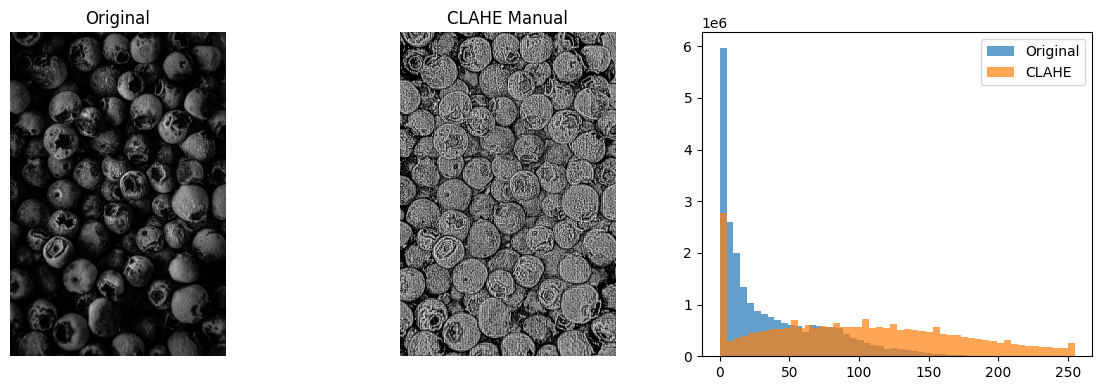

True

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def clahe_manual(imagen, tamano_tile=64, limite_recorte=2.0):
    h, w = imagen.shape
    resultado = np.zeros_like(imagen, dtype=np.float32)
    
    for y in range(0, h, tamano_tile):
        for x in range(0, w, tamano_tile):
            tile = imagen[y:y+tamano_tile, x:x+tamano_tile]
            
            hist = np.zeros(256)
            for valor in tile.flatten():
                hist[valor] += 1
            
            limite = int(limite_recorte * tile.size / 256)
            for i in range(256):
                if hist[i] > limite:
                    hist[i] = limite
            
            cdf = hist.cumsum()
            cdf_normalizado = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
            
            tile_mejorado = cdf_normalizado[tile]
            resultado[y:y+tamano_tile, x:x+tamano_tile] = tile_mejorado
    
    return np.clip(resultado, 0, 255).astype(np.uint8)

imagen_original = cv2.imread('1.jpg')
imagen_gris = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2GRAY)

imagen_clahe = clahe_manual(imagen_gris, tamano_tile=32, limite_recorte=2.0)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagen_clahe, cmap='gray')
plt.title('CLAHE Manual')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.hist(imagen_gris.ravel(), bins=50, alpha=0.7, label='Original')
plt.hist(imagen_clahe.ravel(), bins=50, alpha=0.7, label='CLAHE')
plt.legend()

plt.tight_layout()
plt.show()

cv2.imwrite('imagen1_original.jpg', imagen_gris)
cv2.imwrite('imagen1_clahe_manual.jpg', imagen_clahe)